<a href="https://colab.research.google.com/github/necronet/Notebooks/blob/master/DSP/MusicExplorationWithLibrosa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
  !pip install librosa==0.8.0

     |████████████████████████████████| 184kB 2.7MB/s 
     |████████████████████████████████| 51kB 5.1MB/s 
  Created wheel for librosa: filename=librosa-0.8.0-cp36-none-any.whl size=201377 sha256=fc0533474c97418591954d74984ec8807e67575434f1dcd3dd9dd66ffa2a6b3e
  Stored in directory: /root/.cache/pip/wheels/ee/10/1e/382bb4369e189938d5c02e06d10c651817da8d485bfd1647c9
Successfully built librosa
  Found existing installation: librosa 0.6.3
    Uninstalling librosa-0.6.3:
      Successfully uninstalled librosa-0.6.3


In [34]:
# Import section
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

In [4]:
filename = librosa.example('nutcracker')
y, sr = librosa.load(filename)

tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))
beat_times = librosa.frames_to_time(beat_frames, sr=sr)


Estimated tempo: 107.67 beats per minute


In [11]:
librosa.__version__

'0.8.0'

In [6]:
hop_length = 512
y_harmonic, y_percussive = librosa.effects.hpss(y)

# Beat track on the percussive signal
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive,
                                             sr=sr)

# Compute MFCC features from the raw signal
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=13)

# And the first-order differences (delta features)
mfcc_delta = librosa.feature.delta(mfcc)

# Stack and synchronize between beat events
# This time, we'll use the mean value (default) instead of median
beat_mfcc_delta = librosa.util.sync(np.vstack([mfcc, mfcc_delta]),
                                    beat_frames)

# Compute chroma features from the harmonic signal
chromagram = librosa.feature.chroma_cqt(y=y_harmonic,
                                        sr=sr)

# Aggregate chroma features between beat events
# We'll use the median value of each feature between beat frames
beat_chroma = librosa.util.sync(chromagram,
                                beat_frames,
                                aggregate=np.median)

# Finally, stack all beat-synchronous features together
beat_features = np.vstack([beat_chroma, beat_mfcc_delta])

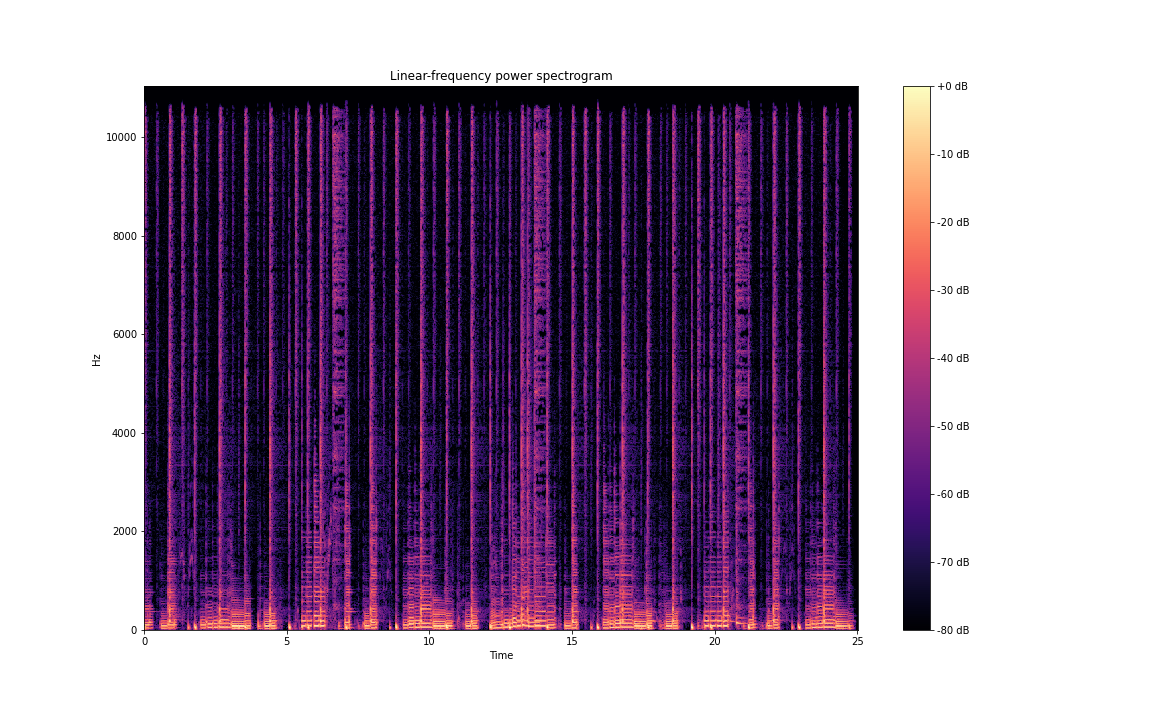

In [45]:
y, sr = librosa.load(librosa.ex('choice'), duration=30)
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(16, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

img = librosa.display.specshow(D, y_axis='linear', x_axis='time',sr=sr, ax=ax)
ax.set(title='Linear-frequency power spectrogram')
ax.label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")

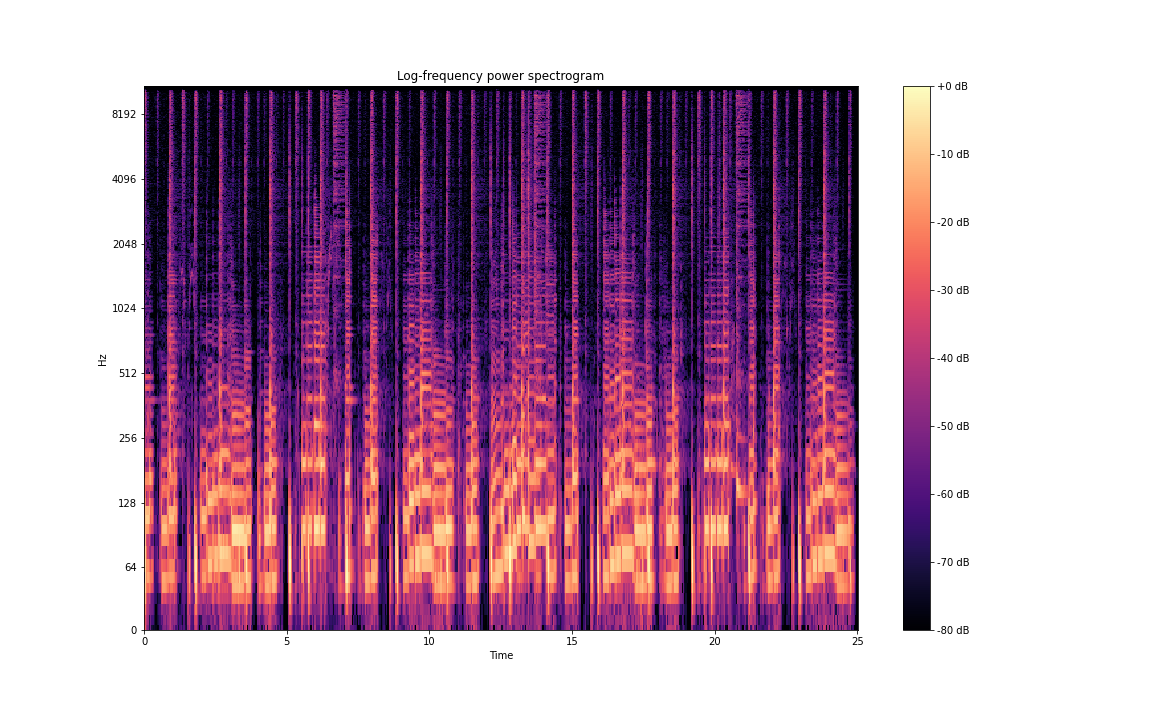

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True,figsize=(16, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=hop_length)), ref=np.max)
img = librosa.display.specshow(D, y_axis='log', x_axis='time',sr=sr, ax=ax, hop_length=hop_length)
ax.set(title='Log-frequency power spectrogram')
ax.label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")

[Text(0.5, 1.0, 'Harmonic + Percussive')]

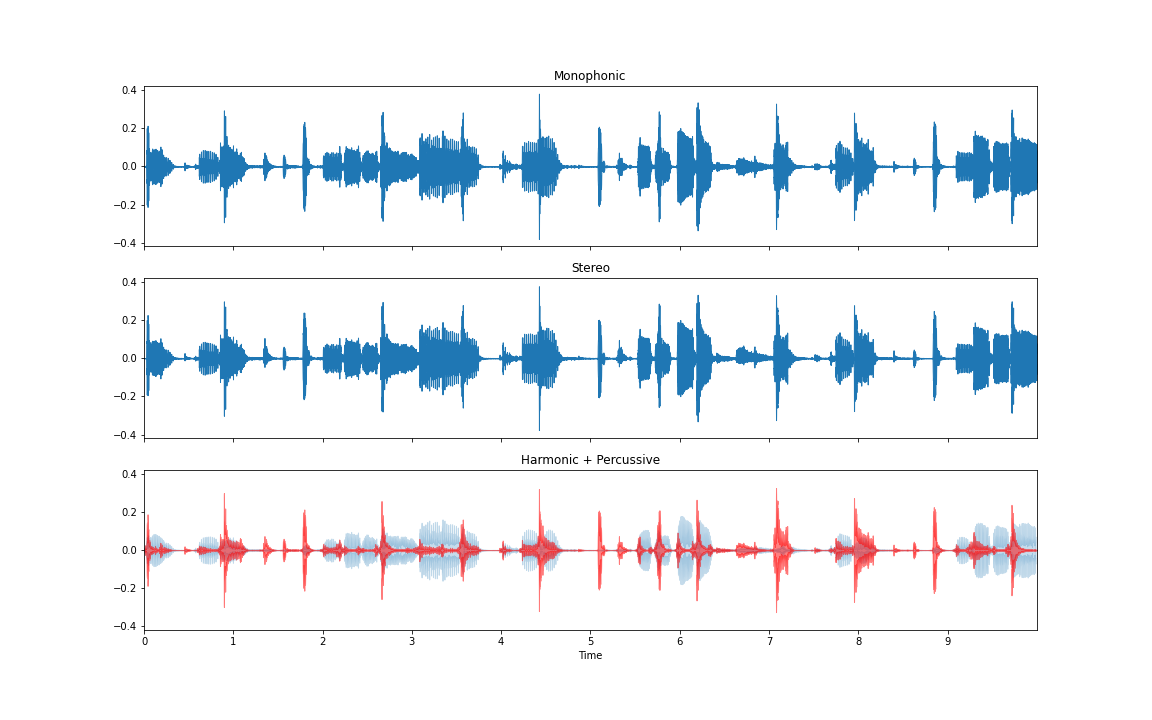

In [49]:
y, sr = librosa.load(librosa.ex('choice'), duration=10)
fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True,figsize=(16, 10))
librosa.display.waveplot(y, sr=sr, ax=ax[0])
ax[0].set(title='Monophonic')
ax[0].label_outer()

y, sr = librosa.load(librosa.ex('choice', hq=True), mono=False, duration=10)
librosa.display.waveplot(y, sr=sr, ax=ax[1])
ax[1].set(title='Stereo')
ax[1].label_outer()


y, sr = librosa.load(librosa.ex('choice'), duration=10)
y_harm, y_perc = librosa.effects.hpss(y)
librosa.display.waveplot(y_harm, sr=sr, alpha=0.25, ax=ax[2])
librosa.display.waveplot(y_perc, sr=sr, color='r', alpha=0.5, ax=ax[2])
ax[2].set(title='Harmonic + Percussive')